In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [37]:
df = pd.read_csv('dataset.csv')

In [38]:
df.shape

(500, 2)

In [39]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [40]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise exploratória - Resumo estatístico

In [42]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [43]:
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [44]:
df['horas_estudo_mes'].describe() # Variável preditora

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

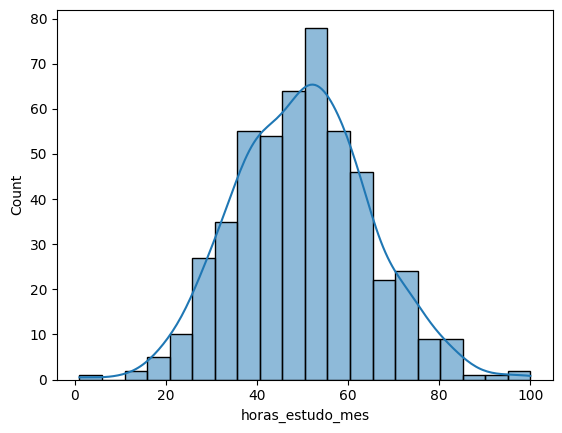

In [45]:
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True)
plt.show()

## Preparação dos dados

In [46]:
X = np.array(df['horas_estudo_mes'])

In [47]:
X = X.reshape(-1, 1)

In [48]:
y = df['salario']

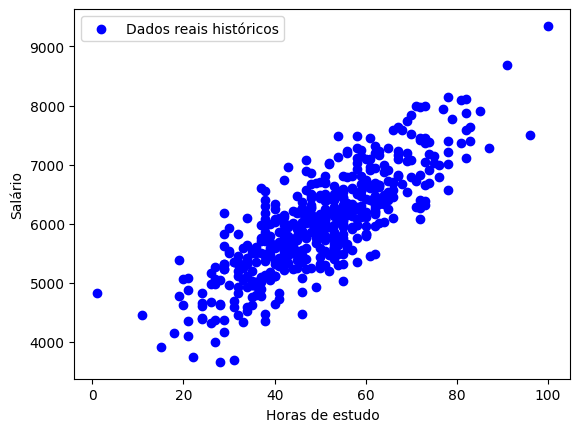

In [49]:
plt.scatter(X, y, color = 'blue', label = 'Dados reais históricos')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [50]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
X_treino.shape

(400, 1)

In [52]:
X_teste.shape

(100, 1)

In [53]:
y_treino.shape

(400,)

In [54]:
y_teste.shape

(100,)

## Modelagem primitiva (Machine learning)

In [55]:
modelo = LinearRegression()

In [56]:
modelo.fit(X_treino, y_treino)

LinearRegression()

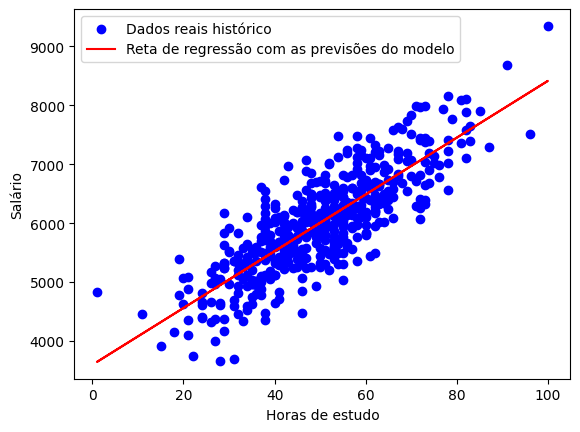

In [57]:
plt.scatter(X, y, color = 'b', label = 'Dados reais histórico')
plt.plot(X, modelo.predict(X), color = 'r', label = 'Reta de regressão com as previsões do modelo')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [58]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.59


In [59]:
modelo.intercept_

3596.783724372753

In [60]:
modelo.coef_

array([48.18185277])

## Deploy do modelo

In [64]:
horas_estudo_novo = np.array([[48]])

salario_previsto = modelo.predict(horas_estudo_novo)

print('Se você estudar cerca de', horas_estudo_novo, 'horas por mês, seu salário pode ser igual à', salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário pode ser igual à [5909.5126574]
